## 前提
- 太陽系半径：1.575光年　→ 1.5×10**16m
- π≒３とすると太陽系体積：4/3π×{(3/2)×10**16}**3 →　27/2×(10)**48㎥
- 栗まんじゅう体積：　0.0001㎥
- 東京ドーム体積：1240000㎥


In [30]:
import numpy as np

count = 0
total_manjyu_v = 0
def full_manjyu_trantion(manjyu_v, target_v):
    def full_manjyu_time(manjyu_v, target_v):
        global count
        global total_manjyu_v
        while total_manjyu_v < target_v:
            total_manjyu_v += manjyu_v * (2 ** count) 
            count += 1
            
        return (count -1) * 5    # 満杯になるまでにかかる時間（分）
    
    total_minutes = full_manjyu_time(manjyu_v, target_v)
    list_manjyu_v = [manjyu_v*(2**i) for i in range(0, count)]    
    list_total_manjyu_v = np.cumsum(list_manjyu_v)    #　　満杯になるまで体積増加の累計リスト（㎥）
    
    return total_minutes, list_total_manjyu_v    

t_m_dome, f_tokyodome_v = full_manjyu_trantion(0.0001, 1240000)
print(t_m_dome)    # 東京ドームが栗まんじゅうで満杯になる時間（分）

t_m_solor, f_solor_v = full_manjyu_trantion(0.0001, 27/2*(10**48))
print(t_m_solor)   # 太陽系が栗まんじゅうで満杯になる時間（分）


165
880


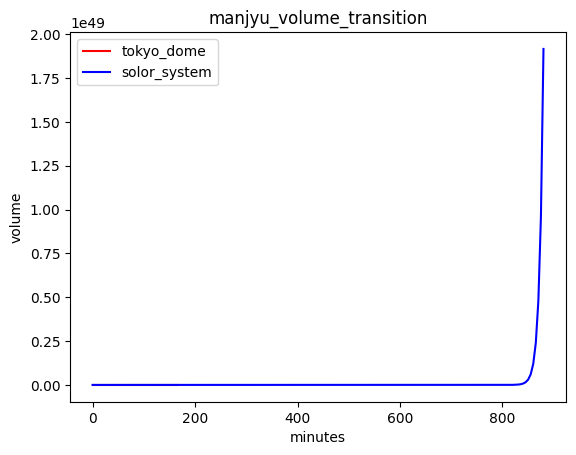

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x1 = np.arange(0, t_m_dome+5, 5)
y1 = f_tokyodome_v
x2 = np.arange(0, t_m_solor+5, 5)
y2 = f_solor_v

ax.set_xlabel('minutes')   # x軸ラベル
ax.set_ylabel('volume')    # y軸ラベル
ax.set_title('manjyu_volume_transition')   # グラフタイトル

ax.plot(x1, y1, color="red", label="tokyo_dome")
ax.plot(x2, y2, color="blue", label="solor_system")
ax.legend(loc=0) 

plt.show()